<a href="https://colab.research.google.com/github/HromovAndrey/II_mood_4_part_1_practica/blob/Practika-2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [2]:
import torch

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [3]:
tensor = torch.tensor([1, 2, 3, 4, 5, 6])
print(tensor)

tensor([1, 2, 3, 4, 5, 6])


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [4]:
print(torch.cuda.is_available())

if torch.cuda.is_available():
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

tensor = torch.tensor([1, 2, 3, 4, 5, 6])
print(tensor.device)

True
1
Tesla T4
cpu


# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [13]:
tensor = torch.randn(5, 6)
print(f'rand{tensor}\n')
tensor_view = tensor.view(6, 5)
print(tensor_view)

tensor_view = tensor.reshape(5, 6)
tensor_view += 1
tensor

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor = tensor.to(device)
tensor

tensor1 = torch.tensor(1.0, requires_grad=True)
print(f'{tensor1=}')

randtensor([[-7.0543e-01, -9.5087e-01,  7.3863e-01, -2.1838e+00, -4.4461e-01,
         -7.3682e-01],
        [ 3.0342e-01, -1.7225e+00,  2.0519e+00, -6.1621e-01, -5.5384e-01,
         -9.3781e-01],
        [-6.8573e-01, -6.2163e-01, -5.9350e-01, -7.7530e-03,  6.0961e-02,
         -1.5013e+00],
        [ 1.4972e-01, -6.2001e-04, -6.2403e-01,  9.7544e-01, -2.5395e-02,
          3.0590e-01],
        [ 1.5218e+00, -5.9575e-01, -4.4355e-01, -1.5247e-01, -3.2424e-01,
         -1.7679e-01]])

tensor([[-7.0543e-01, -9.5087e-01,  7.3863e-01, -2.1838e+00, -4.4461e-01],
        [-7.3682e-01,  3.0342e-01, -1.7225e+00,  2.0519e+00, -6.1621e-01],
        [-5.5384e-01, -9.3781e-01, -6.8573e-01, -6.2163e-01, -5.9350e-01],
        [-7.7530e-03,  6.0961e-02, -1.5013e+00,  1.4972e-01, -6.2001e-04],
        [-6.2403e-01,  9.7544e-01, -2.5395e-02,  3.0590e-01,  1.5218e+00],
        [-5.9575e-01, -4.4355e-01, -1.5247e-01, -3.2424e-01, -1.7679e-01]])
tensor1=tensor(1., requires_grad=True)


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

Mean Absolute Error (MAE): 80.84040832519531


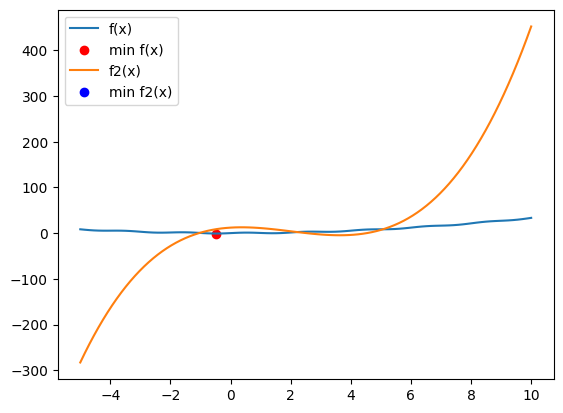

In [22]:

import torch
import matplotlib.pyplot as plt

def f(x):
    return x**2 / 3 + torch.sin(torch.pi * x)

x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)

for _ in range(1000):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()
    optimizer.step()

def f2(x):
    return x**3 - 6*x**2 + 4*x + 12

x2 = torch.tensor(0.0, requires_grad=True)
optimizer2 = torch.optim.SGD([x2], lr=0.01)

for _ in range(1000):
    optimizer2.zero_grad()
    loss2 = f2(x2)
    loss2.backward()
    optimizer2.step()

tensor1 = torch.linspace(-5, 10, 100)
tensor2 = torch.linspace(-5, 10, 100)

values_f = f(tensor1)
values_f2 = f2(tensor2)

mae = torch.mean(torch.abs(values_f - values_f2))

print("Mean Absolute Error (MAE):", mae.item())

plt.plot(tensor1.cpu(), values_f.cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min f(x)')
plt.plot(tensor2.cpu(), values_f2.cpu(), label='f2(x)')
plt.scatter(x2.item(), f2(x2).item(), c='blue', label='min f2(x)')

plt.legend()
plt.show()



# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [26]:
tensor1 = torch.rand((32, 28, 28))
tensor2 = torch.rand((16, 28, 28))
tensor3 = torch.rand((64, 28, 28))

tensor4 = torch.cat((tensor1, tensor2, tensor3), dim=0)
print(tensor4.size())

torch.Size([112, 28, 28])


# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [5]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [6]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2